<a href="https://colab.research.google.com/github/gabrielefrn/qc-minicourse/blob/main/qc_minicourse_10abr24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum noise and error mitigation

Simulanting quantum noise

In [ ]:
!pip install numpy
!pip install git+https://github.com/qiboteam/qiboedu
!pip install qibo
!pip install qibojit

  Cloning https://github.com/qiboteam/qiboedu to /tmp/pip-req-build-lh9f7m6d
  Running command git clone --filter=blob:none --quiet https://github.com/qiboteam/qiboedu /tmp/pip-req-build-lh9f7m6d
  Resolved https://github.com/qiboteam/qiboedu to commit 57594cde061a007f0ee6015d05c7a95bd4627baa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.2/258.2 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 14.0 MB/s eta 0:00:00
  Created wheel for qiboedu: filename=qiboedu-0.1.0-py3-none-any.whl size=166

ERROR: Operation cancelled by user


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import qibo
from qibo import Circuit, gates, hamiltonians

from qiboedu.scripts import plotscripts

In [4]:
#set qibo's backend
qibo.get_backend()

[Qibo 0.2.7|INFO|2024-04-10 17:42:36]: Using qibojit (numba) backend on /CPU:0
INFO:qibo.config:Using qibojit (numba) backend on /CPU:0


'qibojit (numba)'

In [5]:
#define a parametric circuit with layered architecture
nqubits = 3
nlayers = 3

#activate density matrix mode
c = Circuit(nqubits, density_matrix=True)

for l in range(nlayers):
  for q in range(nqubits):
    c.add(gates.RY(q=q, theta=0))
    c.add(gates.RZ(q=q, theta=0))
  for q in range(0, nqubits-1, 1):
    c.add(gates.CNOT(q0=q, q1=q+1))
c.add(gates.M(*range(nqubits)))

MeasurementResult(qubits=(0, 1, 2), nshots=0)

In [9]:
print(c.draw())
print(f"\n",c.summary())

nparams = len(c.get_parameters())
print(f"Number of parameters: {nparams}")

q0: ─RY─RZ─o───RY─RZ─o───RY─RZ─o───M─
q1: ─RY─RZ─X─o─RY─RZ─X─o─RY─RZ─X─o─M─
q2: ─RY─RZ───X─RY─RZ───X─RY─RZ───X─M─

 Circuit depth = 13
Total number of gates = 25
Number of qubits = 3
Most common gates:
ry: 9
rz: 9
cx: 6
measure: 1
Number of parameters: 18


In [10]:
#fix the set of angles
angles = np.linspace(0, 2 * np.pi, nparams)
print(angles)

[0.         0.36959914 0.73919827 1.10879741 1.47839654 1.84799568
 2.21759481 2.58719395 2.95679309 3.32639222 3.69599136 4.06559049
 4.43518963 4.80478876 5.1743879  5.54398704 5.91358617 6.28318531]


In [11]:
#set the angles into the circuit
c.set_parameters(angles)

In [12]:
print(c.get_parameters())

[(0.0,), (0.36959913571644626,), (0.7391982714328925,), (1.1087974071493387,), (1.478396542865785,), (1.8479956785822313,), (2.2175948142986774,), (2.587193950015124,), (2.95679308573157,), (3.326392221448016,), (3.6959913571644627,), (4.065590492880909,), (4.435189628597355,), (4.804788764313801,), (5.174387900030248,), (5.543987035746694,), (5.91358617146314,), (6.283185307179586,)]


In [13]:
#observable definition
obs = hamiltonians.Z(nqubits=nqubits)
print(obs.matrix)

[[-3.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -1.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -1.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j  1.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -1.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j  1.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j  1.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j  3.-0.j]]


Computing the exact expectation valute:

(0.04098+0j)|000><000| + (0.05215+0.09312j)|000><001| + (-0.00872-0.02801j)|000><010| + (-0.03659-0.10883j)|000><011| + (0.02184-0.00063j)|000><100| + (0.00065+0.0529j)|000><101| + (-0.03929+0.03608j)|000><110| + (-0.00399+0.0879j)|000><111| + (0.05215-0.09312j)|001><000| + (0.27797-0j)|001><001| + (-0.07475-0.01582j)|001><010| + (-0.29388-0.05533j)|001><011| + (0.02635-0.05043j)|001><100| + (0.12105+0.06585j)|001><101| + (0.032+0.1352j)|001><110| + (0.19468+0.12092j)|001><111| + (-0.00872+0.02801j)|010><000| + (-0.07475+0.01582j)|010><001| + (0.021+0j)|010><010| + (0.08218-0.00185j)|010><011| + ...


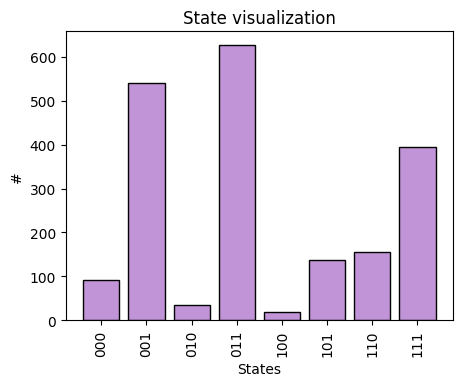

In [17]:
#execute the circuit
final_state = c(nshots=2000)

print(final_state)

#collect and visualize frequencies
frequencies = final_state.frequencies(binary=True)
#print(frequencies)

plotscripts.visualize_states(frequencies)

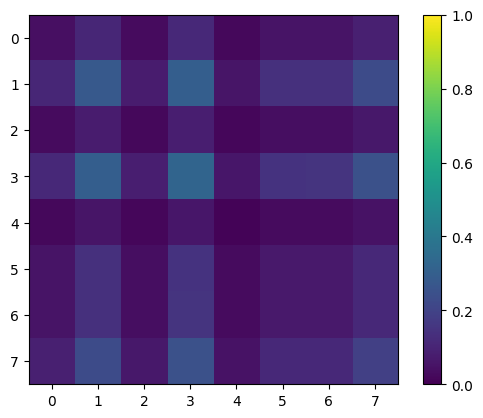

In [23]:
#plot the density matrix
plt.imshow(np.abs(c().state()), vmin=0, vmax=1)
plt.colorbar()

In [26]:
#compute the expected value with expectation_from_samples
exp_value = obs.expectation_from_samples(frequencies)
print(exp_value)

0.6159999999999999


Noise

In [47]:
#define the Pauli's probabilities for each qubit of the system
noise_map = {
    0: list(zip(["X", "Z"], [0.007, 0.008])),
    1: list(zip(["Y", "Z"], [0.01, 0.005])),
    2: list(zip(["X", "Z"], [0.008, 0.007]))
}

#Use the circuit.with_pauli_noise
noisy_c = c.with_pauli_noise(noise_map)

In [48]:
print(noisy_c.draw(legend=True))
print(f"\n", c.draw())

q0: ─RY─PN─RZ─PN─o─PN───RY─PN─RZ─PN────o─PN───RY─PN─RZ─PN────o─PN──────M─
q1: ─RY─PN─RZ─PN─X─PN─o─PN─RY─PN─RZ─PN─X─PN─o─PN─RY─PN─RZ─PN─X─PN─o─PN─M─
q2: ─RY─PN─RZ─PN──────X─PN─RY─PN─RZ─PN──────X─PN─RY─PN─RZ─PN──────X─PN─M─

 Legend for callbacks and channels: 
| Gate              | Symbol   |
|-------------------+----------|
| PauliNoiseChannel | PN       |

 q0: ─RY─RZ─o───RY─RZ─o───RY─RZ─o───M─
q1: ─RY─RZ─X─o─RY─RZ─X─o─RY─RZ─X─o─M─
q2: ─RY─RZ───X─RY─RZ───X─RY─RZ───X─M─


In [49]:
#set the parameters
noisy_c.get_parameters()

[(0.0,),
 (0.36959913571644626,),
 (0.7391982714328925,),
 (1.1087974071493387,),
 (1.478396542865785,),
 (1.8479956785822313,),
 (2.2175948142986774,),
 (2.587193950015124,),
 (2.95679308573157,),
 (3.326392221448016,),
 (3.6959913571644627,),
 (4.065590492880909,),
 (4.435189628597355,),
 (4.804788764313801,),
 (5.174387900030248,),
 (5.543987035746694,),
 (5.91358617146314,),
 (6.283185307179586,)]

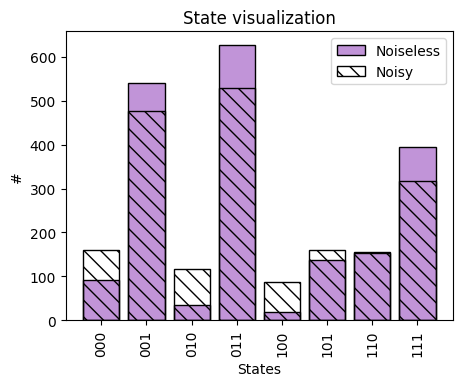

In [50]:
#execute the circuit
noisy_final_state = noisy_c(nshots=2000)

noisy_frequencies = noisy_final_state.frequencies(binary=True)

plotscripts.visualize_states(frequencies, noisy_frequencies)

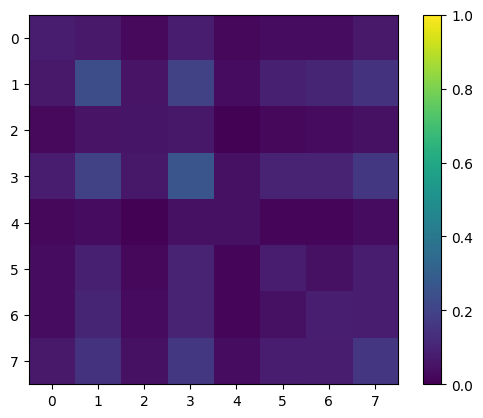

In [51]:
#plot the density matrix
plt.imshow(np.abs(noisy_c().state()), vmin=0, vmax=1)
plt.colorbar()

#if noisy is too strong, matrix is diagonal

In [52]:
#compare the expectation values with and without noise
noisy_exp = obs.expectation_from_samples(noisy_frequencies)

print(f"Noiseless expectation value: {exp_value}")
print(f"Noisy expectation value: {noisy_exp}")

Noiseless expectation value: 0.6159999999999999
Noisy expectation value: 0.319


# Mitigating the noise - Lecture Part 2 (Lec7)

In [39]:
import numpy as np
import matplotlib.pyplot as plt

import qibo

from qibo import Circuit, gates, hamiltonians

from qibo.models import error_mitigation
from qibo.noise import PauliError, NoiseModel

In [53]:
nqubits = 3
nlayers = 3

c = Circuit(nqubits, density_matrix=True)

for l in range(nlayers):
  for q in range(nqubits):
    c.add(gates.RY(q=q, theta=0))
    c.add(gates.RZ(q=q, theta=0))

  for q in range(0, nqubits-1, 1): #entanglement
    c.add(gates.CNOT(q0=q, q1=q+1))

c.add(gates.M(*range(nqubits)))

#set the angles
nparams = len(c.get_parameters())
angles = np.linspace(0, 2*np.pi, nparams)

#set the angles into the circuit
c.set_parameters(angles)

print(c.draw())

#observable definition
obs = hamiltonians.Z(nqubits=nqubits)

q0: ─RY─RZ─o───RY─RZ─o───RY─RZ─o───M─
q1: ─RY─RZ─X─o─RY─RZ─X─o─RY─RZ─X─o─M─
q2: ─RY─RZ───X─RY─RZ───X─RY─RZ───X─M─


In [54]:
#generate a random circuit using CDR - Cifford De Requirements

cdr_circuit = error_mitigation.sample_training_circuit_cdr(c)

print(c.draw(), "\n")
print(cdr_circuit.draw())

print(c.get_parameters())
print(cdr_circuit.get_parameters())


q0: ─RY─RZ─o───RY─RZ─o───RY─RZ─o───M─
q1: ─RY─RZ─X─o─RY─RZ─X─o─RY─RZ─X─o─M─
q2: ─RY─RZ───X─RY─RZ───X─RY─RZ───X─M─ 

q0: ─RY─RZ─o───RY─RZ─o───RY─RZ─o───M─
q1: ─RY─RZ─X─o─RY─RZ─X─o─RY─RZ─X─o─M─
q2: ─RY─RZ───X─RY─RZ───X─RY─RZ───X─M─
[(0.0,), (0.36959913571644626,), (0.7391982714328925,), (1.1087974071493387,), (1.478396542865785,), (1.8479956785822313,), (2.2175948142986774,), (2.587193950015124,), (2.95679308573157,), (3.326392221448016,), (3.6959913571644627,), (4.065590492880909,), (4.435189628597355,), (4.804788764313801,), (5.174387900030248,), (5.543987035746694,), (5.91358617146314,), (6.283185307179586,)]
[(0.0,), (0.0,), (0.7391982714328925,), (1.1087974071493387,), (1.478396542865785,), (1.5707963267948966,), (2.2175948142986774,), (1.5707963267948966,), (2.95679308573157,), (3.326392221448016,), (3.6959913571644627,), (3.141592653589793,), (4.435189628597355,), (4.804788764313801,), (5.174387900030248,), (5.543987035746694,), (5.91358617146314,), (6.283185307179586,)]


In [56]:
#build the NoiseModel
noise = NoiseModel()

noise.add(PauliError([("X", 0.007), ("Z", 0.008)]), qubits=0)
noise.add(PauliError([("Y", 0.01), ("Z", 0.005)]), qubits=1)
noise.add(PauliError([("X", 0.008), ("Z", 0.007)]), qubits=2)

In [58]:
#execute CDR
mit_exp, noisy_Exp, fit_params, training_data = error_mitigation.CDR(
    circuit = c,
    observable = obs,
    noise_model = noise,
    nshots = 50000,
    n_training_samples = 50,
    full_output = True
)

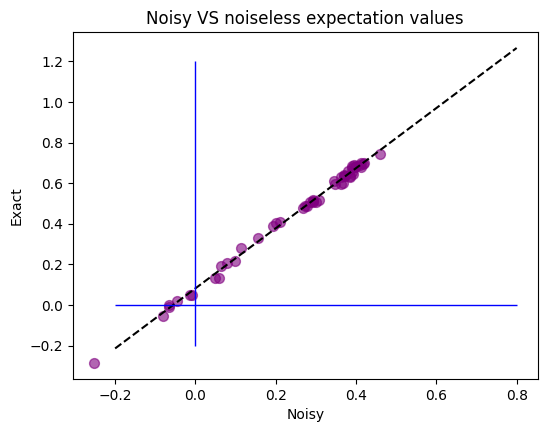

In [61]:
#plot results
x = np.linspace(-0.2, 0.8, 100)
y = fit_params[0] * x + fit_params[1]

plt.figure(figsize=[6, 6*6/8])
plt.title("Noisy VS noiseless expectation values")
plt.xlabel("Noisy")
plt.ylabel("Exact")
plt.plot(x, y, color="black", ls="--", label="CDR fit")
plt.scatter(training_data["noisy"], training_data["noise-free"],
            marker='o', color="purple", alpha=0.6, s=50, label="Training circuit")
plt.vlines(0, -0.2, 1.2, color="blue", ls="-", lw=1)
plt.hlines(0, -0.2, 0.8, color="blue", ls="-", lw=1)
plt.show()

In [63]:
#compare expectation values
print(f"Noisy expval: {noisy_exp}")
print(f"Mitigated expval: {mit_exp}")
print(f"Exact expval: {0.602}")

Noisy expval: 0.319
Mitigated expval: 0.588589419949759
Exact expval: 0.602
